<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## this project has no comment
### becasue of my job i have a little time to do my project so i rather to save time in order to use more course

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz

from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from io import StringIO
from sklearn import tree
import graphviz

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
df=pd.read_csv('C:/Users/pc/Downloads/Video/project/Mini Project 3 - Classification(Titanic)/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df = df.reindex(columns=['PassengerId','Name','Sex','Age','Pclass','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived'])

In [7]:
cross_tab = pd.crosstab(index=[df['Survived'], # First factor to compare
                               df['Sex']], # second factor to compare
                        columns=df['Pclass']) # the factor we want as our "column"
cross_tab

Pclass            1   2    3
Survived Sex                
0        female   3   6   72
         male    77  91  300
1        female  91  70   72
         male    45  17   47

## Data Preprocessing

In [8]:
def create_feat_has_cabin(df, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)):
            return 0
        return 1
        
    return df[colname].apply(_is_nan)
    
df['HasCabin'] = create_feat_has_cabin(df, 'Cabin')

In [9]:
def fill_na_embarked(df, colname):
    
    return df[colname].fillna('S')
    
df['Embarked'] = fill_na_embarked(df, 'Embarked')

In [10]:
def create_feat_familly_size(df):
    return df['SibSp'] + df['Parch'] + 1
    
df['FamilySize'] = create_feat_familly_size(df)

In [11]:
def create_feat_isalone(df, colname):
    def _is_alone(x):
        if x==1:
            return 1
        return 0
    
    return df[colname].apply(_is_alone)
    
df['IsAlone'] = create_feat_isalone(df, 'FamilySize')

In [12]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.fillna(df.mean(),inplace=True)

In [13]:
df['Sex'] = df['Sex'].astype('category').cat.codes.astype(float)
df['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[1, 2, 3], inplace=True)

In [14]:
def create_feat_categoricalFare(df, colname):
    return pd.qcut(df[colname], 4, labels = [0, 1, 2, 3]).astype(int)
df['CategoricalFare'] = create_feat_categoricalFare(df, 'Fare')

In [15]:
def create_feat_title(df, colname):
    def find_title(z):
        title_search = re.search(' ([A-Za-z]+)\.', z)
        if title_search:
            title = title_search.group(1)
            if title in ['Mlle', 'Ms']:
                return 'Miss'
            elif title in ['Mme', 'Mrs']:
                return 'Mrs'
            elif title=='Mr':
                return 'Mr'           
            else:
                return 'Rare'
        return ""
    
    return_title= df[colname].apply(find_title)
    dict_title = {'Miss': 1, 'Mrs':2, 'Mr':3, 'Rare':4}
    return return_title.replace(dict_title)
df['Title'] = create_feat_title(df, 'Name')

In [16]:
'''
def create_feat_title(df, colname):
    title_map = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Mrs': 'Mrs', 'Mr': 'Mr'}
    default_title = 'Rare'
    
    def find_title(x):
        title_search = re.search(' ([A-Za-z]+)\.', x)
        return title_map.get(title_search.group(1) if title_search else default_title, default_title)
    
    return df[colname].apply(find_title).map({v: i+1 for i, v in enumerate(set(find_title(x) for x in df[colname]))})

df['Title'] = create_feat_title(df, 'Name')
'''

"\ndef create_feat_title(df, colname):\n    title_map = {'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Mrs': 'Mrs', 'Mr': 'Mr'}\n    default_title = 'Rare'\n    \n    def find_title(x):\n        title_search = re.search(' ([A-Za-z]+)\\.', x)\n        return title_map.get(title_search.group(1) if title_search else default_title, default_title)\n    \n    return df[colname].apply(find_title).map({v: i+1 for i, v in enumerate(set(find_title(x) for x in df[colname]))})\n\ndf['Title'] = create_feat_title(df, 'Name')\n"

In [17]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [18]:
df.isnull().sum()

Sex                0
Age                0
Pclass             0
SibSp              0
Parch              0
Fare               0
Embarked           0
Survived           0
HasCabin           0
FamilySize         0
IsAlone            0
CategoricalFare    0
Title              0
dtype: int64

In [19]:
df.isna().sum()

Sex                0
Age                0
Pclass             0
SibSp              0
Parch              0
Fare               0
Embarked           0
Survived           0
HasCabin           0
FamilySize         0
IsAlone            0
CategoricalFare    0
Title              0
dtype: int64

In [20]:
df.Embarked.value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [21]:
df.columns

Index(['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived', 'HasCabin', 'FamilySize', 'IsAlone', 'CategoricalFare',
       'Title'],
      dtype='object')

In [22]:
df = df.reindex(columns=['Title','Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked',
        'HasCabin', 'IsAlone', 'CategoricalFare','Survived'])

In [23]:
df = df.astype(float)

In [24]:
df

,Title,Sex,Age,Pclass,SibSp,Parch,Embarked,HasCabin,IsAlone,CategoricalFare,Survived
0,3.0,1.0,22.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,0.0,38.0,1.0,1.0,0.0,2.0,1.0,0.0,3.0,1.0
2,4.0,0.0,26.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,2.0,0.0,35.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0
4,3.0,1.0,35.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,4.0,1.0,27.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
887,4.0,0.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0
888,4.0,0.0,28.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
889,3.0,1.0,26.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0


In [25]:
my_correlation = df.corr()
my_correlation.sort_values(by=['Survived'],ascending=False).iloc[0].sort_values(ascending=False)

Survived           1.000000
HasCabin           0.316912
CategoricalFare    0.299357
Embarked           0.106811
Parch              0.081629
Title              0.030949
SibSp             -0.035322
Age               -0.064910
IsAlone           -0.203367
Pclass            -0.338481
Sex               -0.543351
Name: Survived, dtype: float64

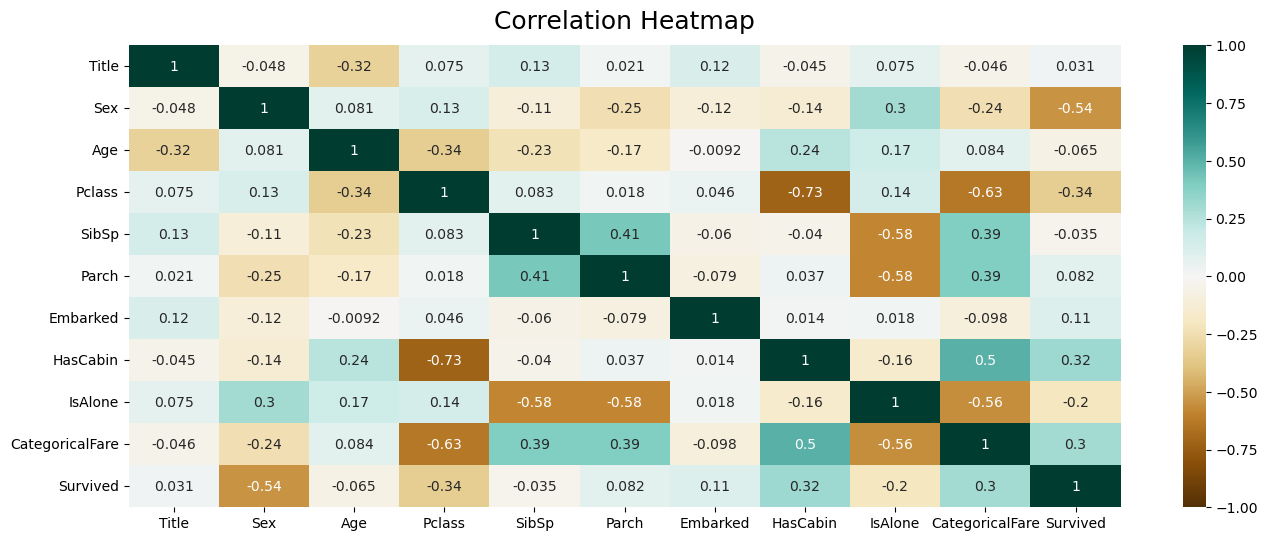

In [26]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(my_correlation, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#### IQR TO FIX OUTLIER 

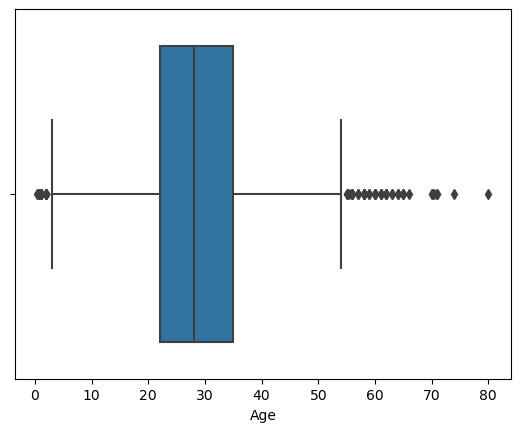

In [27]:
sns.boxplot(x=df['Age'])
plt.show()

In [28]:
df.shape

(891, 11)

In [29]:
'''
# get column names excluding 'Survived'
column_names = [col for col in df.columns.tolist() if col!= 'Survived']

for col in column_names:
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Remove outliers
    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

print(df.shape)'''

"\n# get column names excluding 'Survived'\ncolumn_names = [col for col in df.columns.tolist() if col!= 'Survived']\n\nfor col in column_names:\n    # Calculate Q1 and Q3\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n\n    # Calculate IQR\n    IQR = Q3 - Q1\n\n    # Define lower and upper bounds\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n\n    # Identify outliers\n    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]\n\n    # Remove outliers\n    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]\n\nprint(df.shape)"

#### Z-SCORE TO FIX OUTLIER (IT'S NEED TO CALCUTER MEAN )

In [30]:
column_names = [col for col in df.columns.tolist()]
# Calculate mean and standard deviation
mean = df[column_names].mean()
std = df[column_names].std()

# Calculate z-score
z = (df[column_names] - mean) / std

# Identify outliers
outliers = (abs(z) > 3).any(axis=1)

# Remove outliers
df = df[~outliers]

print(df.shape)


(836, 11)


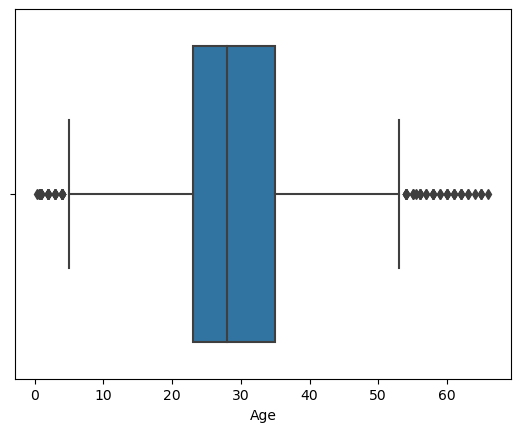

In [31]:
# نمایش نمودار جعبه‌ای برای همان ستون پس از حذف ناهنجاری‌ها
sns.boxplot(x=df['Age'])
plt.show()


In [32]:
df.isnull().sum()

Title              0
Sex                0
Age                0
Pclass             0
SibSp              0
Parch              0
Embarked           0
HasCabin           0
IsAlone            0
CategoricalFare    0
Survived           0
dtype: int64

## Strorytelling - Visualization

array([[<Axes: title={'center': 'Title'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Embarked'}>,
        <Axes: title={'center': 'HasCabin'}>,
        <Axes: title={'center': 'IsAlone'}>],
       [<Axes: title={'center': 'CategoricalFare'}>,
        <Axes: title={'center': 'Survived'}>, <Axes: >]], dtype=object)

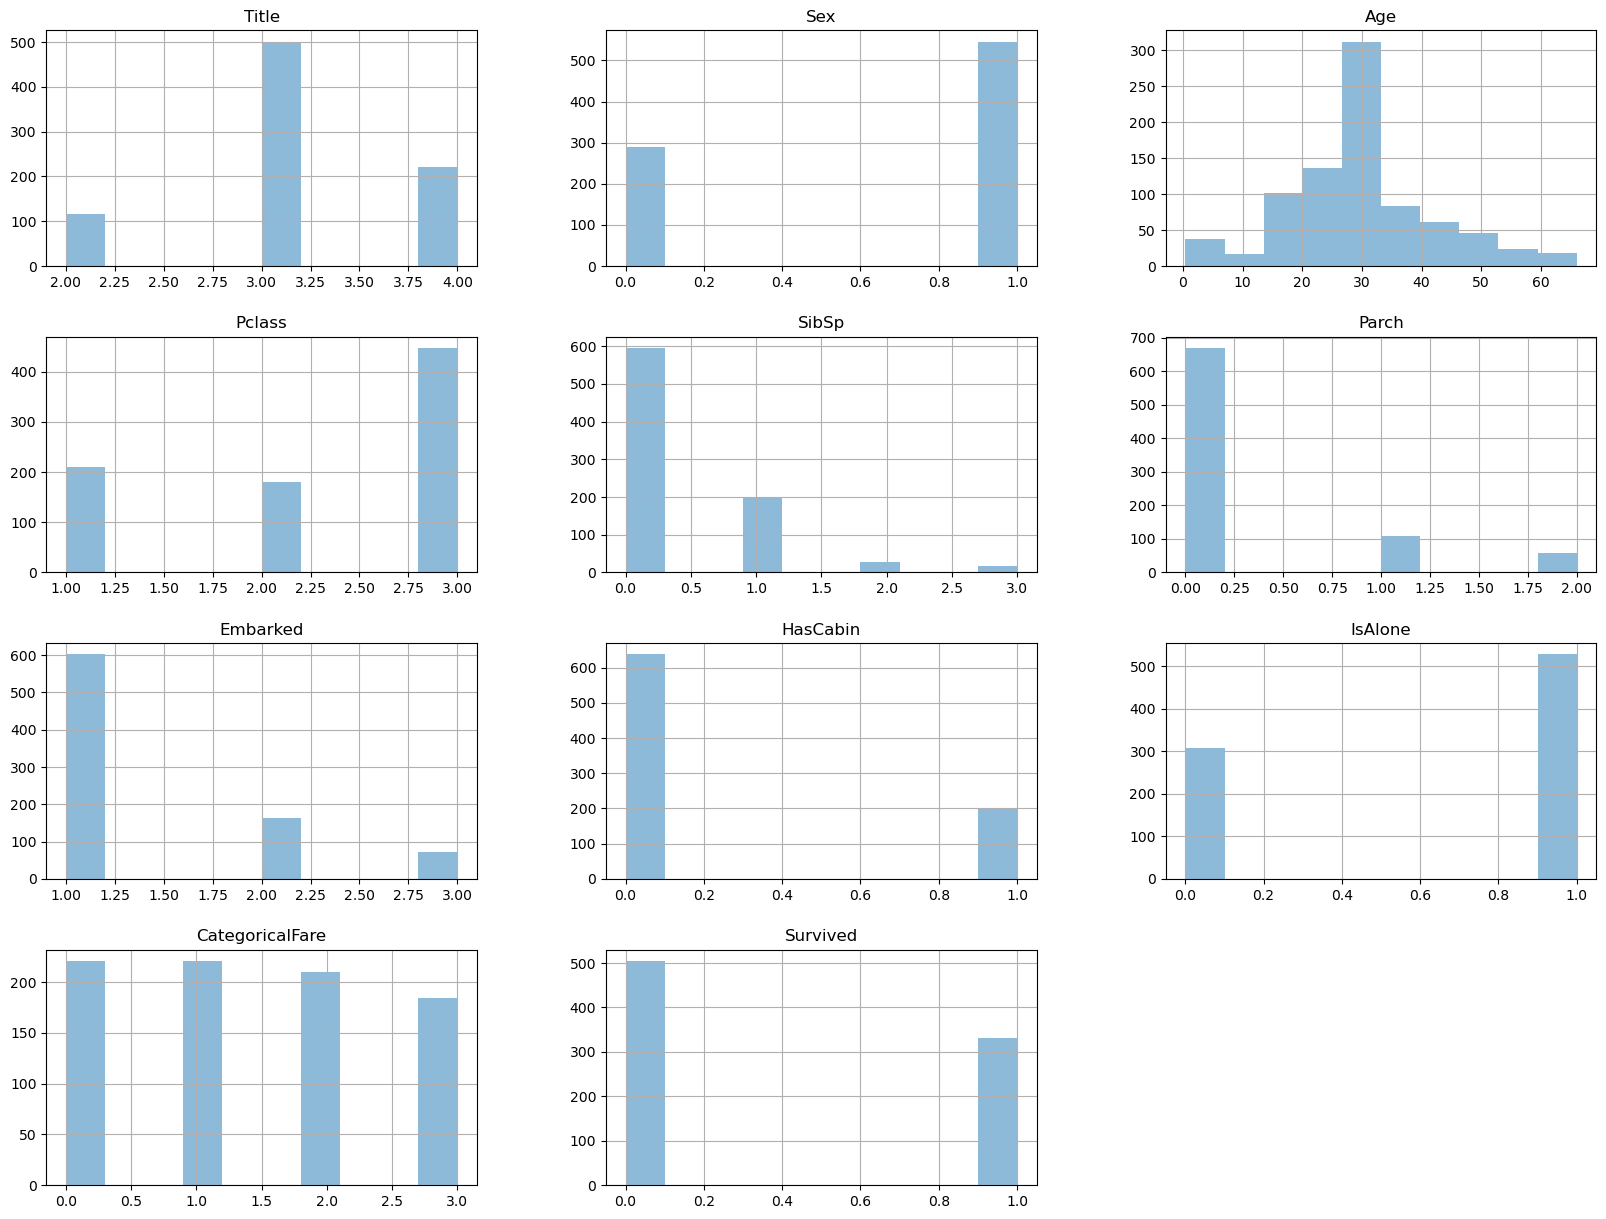

In [33]:
df.hist(alpha=0.5, figsize=(20, 15))

<Figure size 800x1200 with 0 Axes>

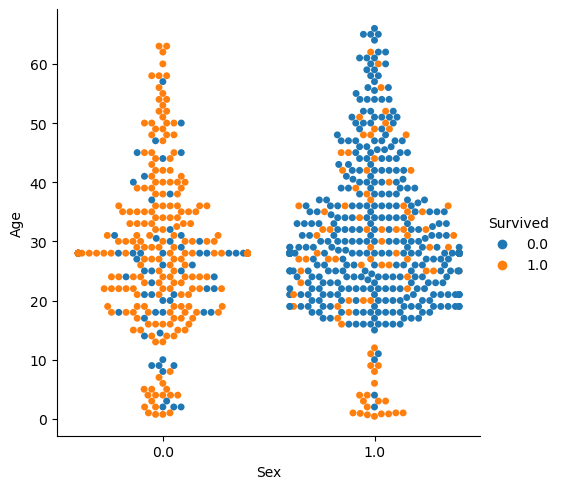

In [34]:
plt.figure(figsize=(10,15),dpi=80)
sns.catplot(data=df, x="Sex", y="Age", hue="Survived", kind="swarm")

<Axes: xlabel='Age', ylabel='Count'>

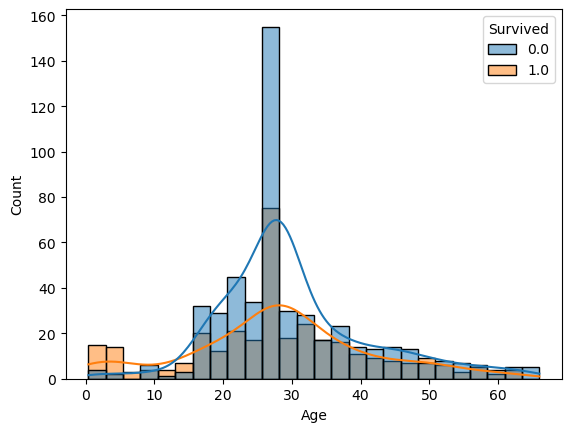

In [35]:
sns.histplot(df,x='Age',hue='Survived', kde=True)

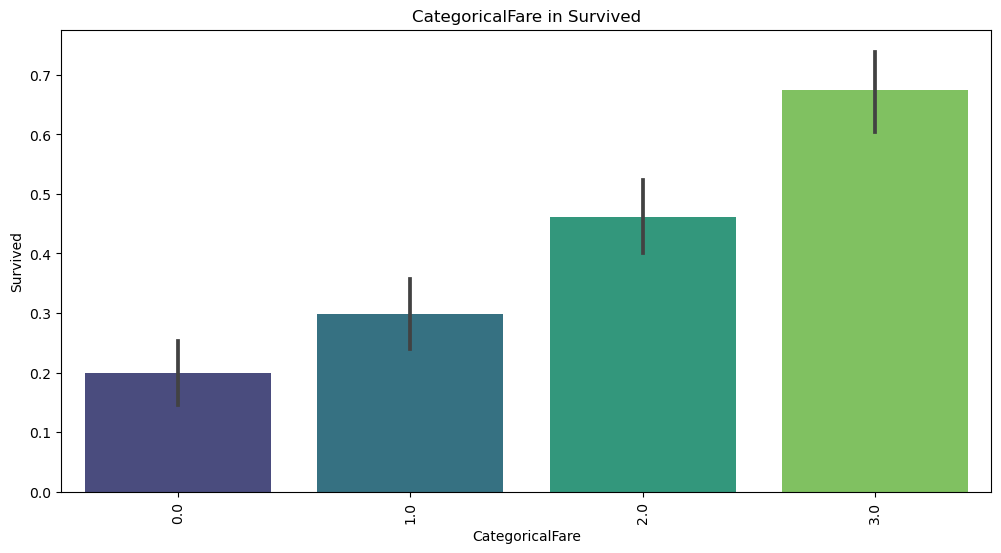

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='CategoricalFare',y='Survived', data=df, palette='viridis')
plt.title('CategoricalFare in Survived')
plt.xlabel('CategoricalFare')
plt.ylabel('Survived')
plt.xticks(rotation=90)
plt.show()
sns.set_theme(style="darkgrid")

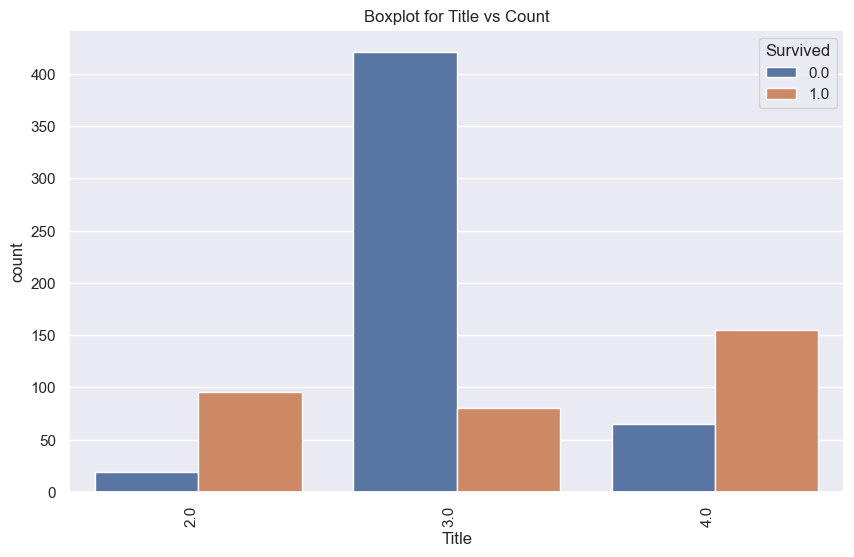

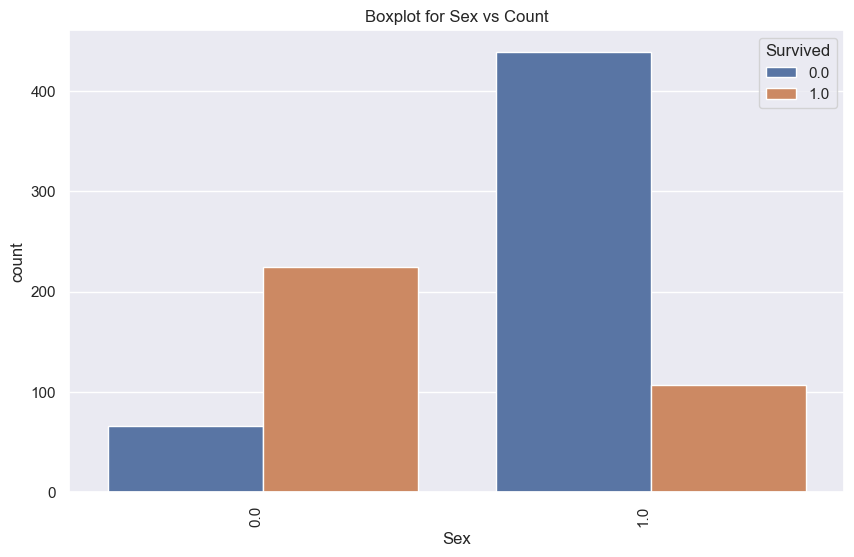

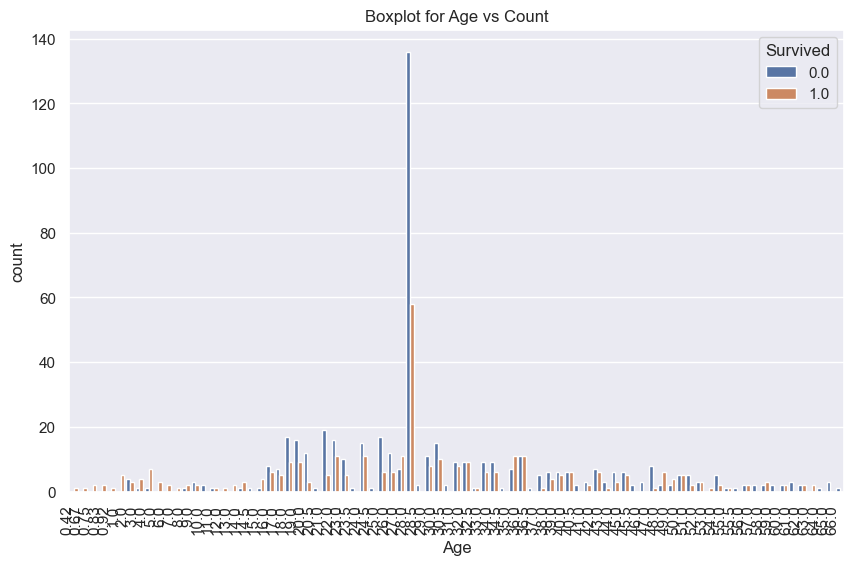

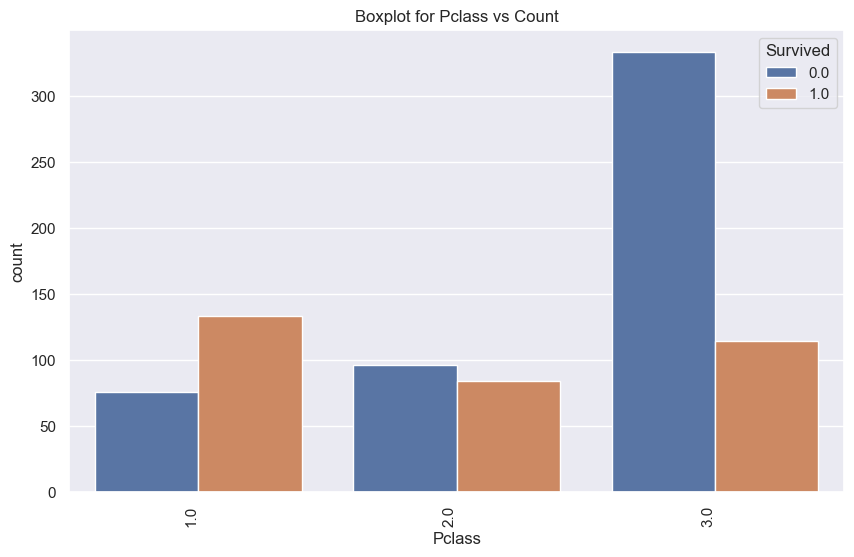

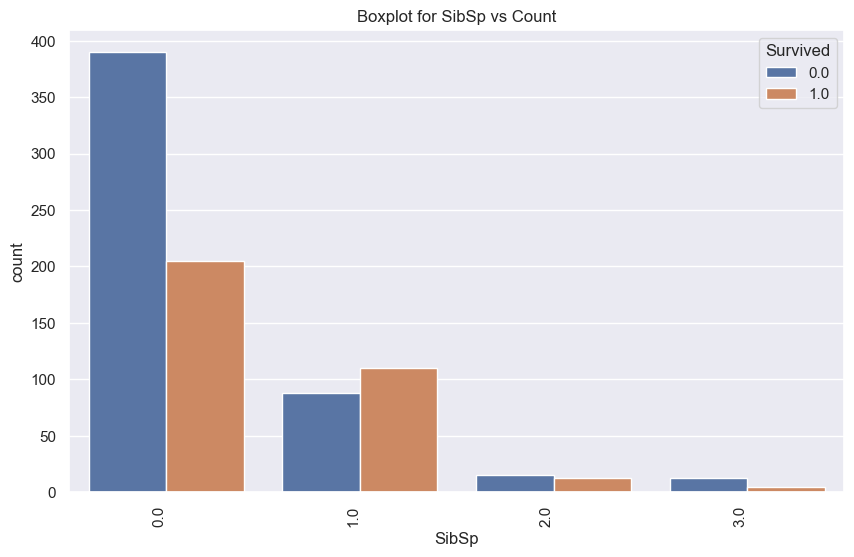

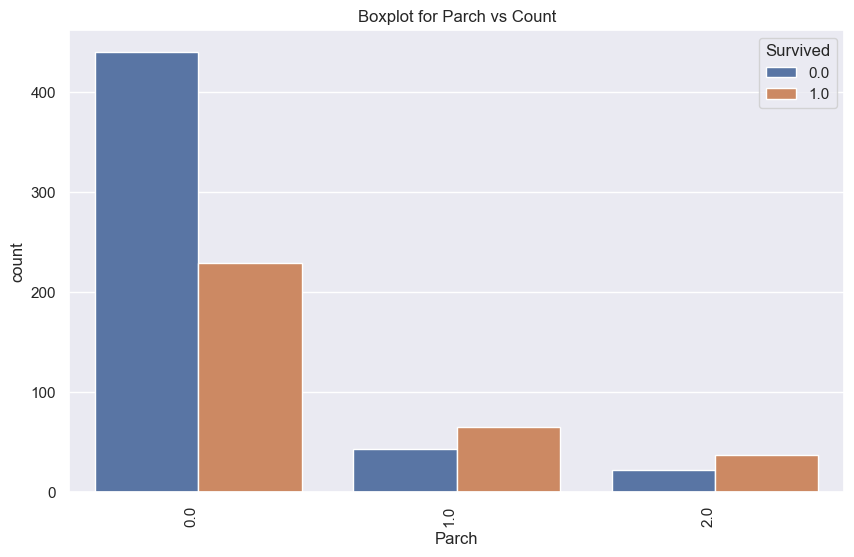

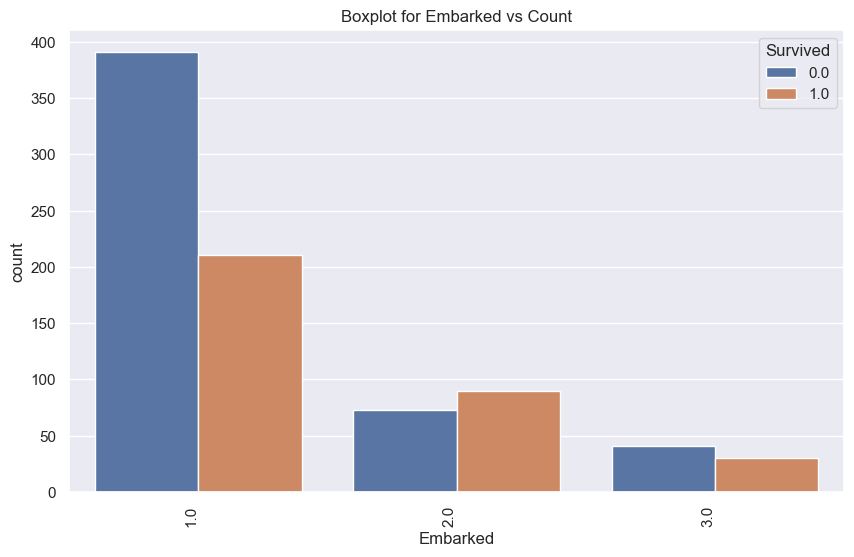

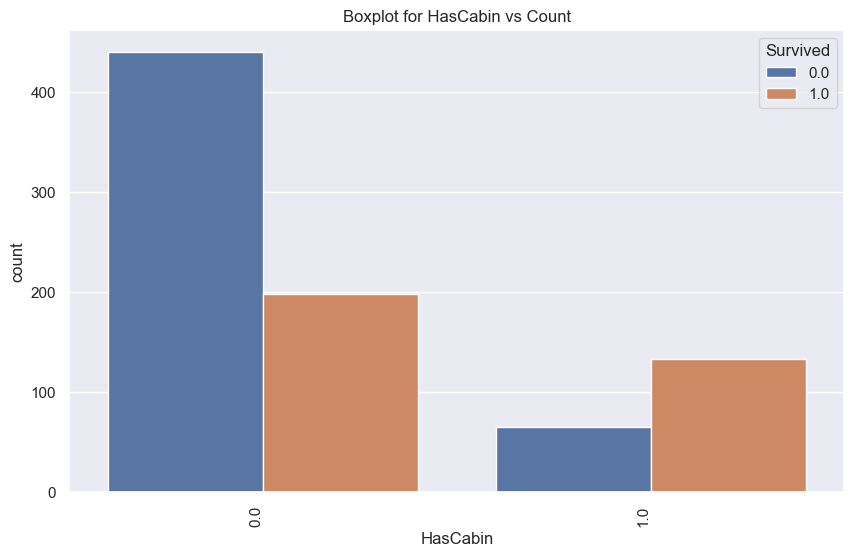

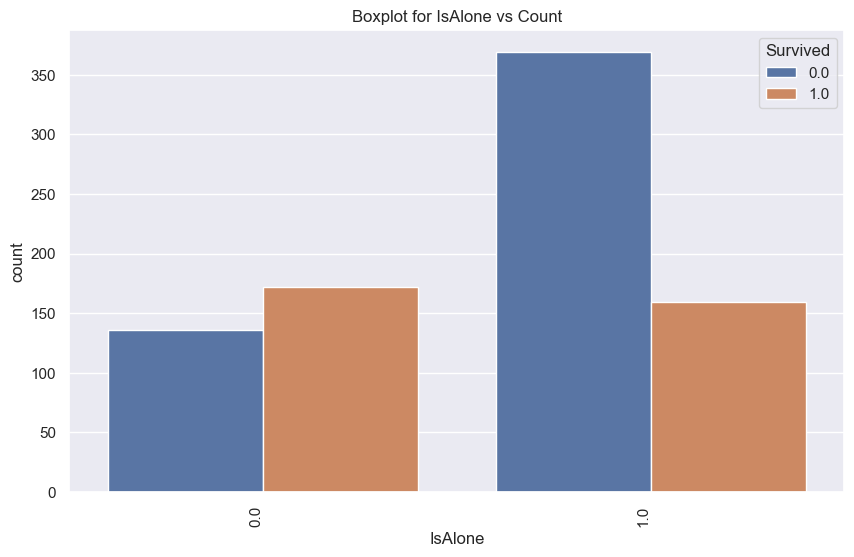

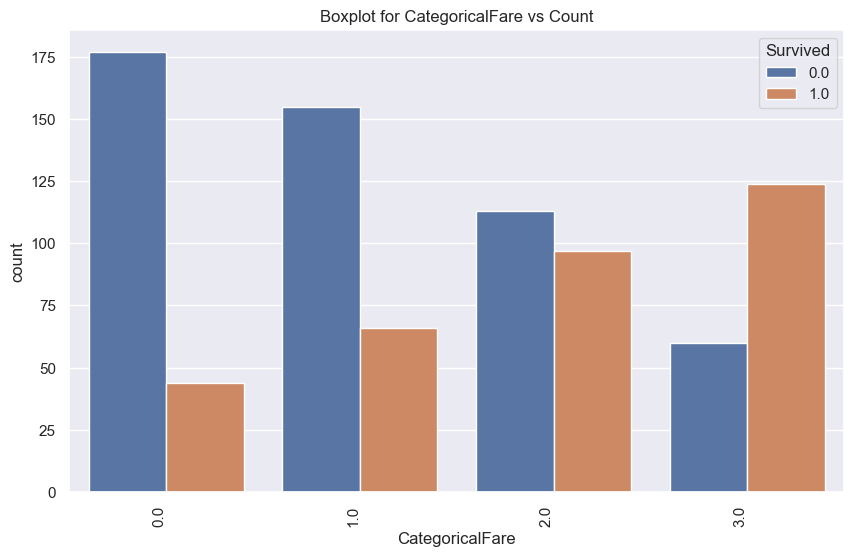

In [37]:
num_cols = ['Title', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked',
       'HasCabin', 'IsAlone', 'CategoricalFare']

for column in num_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue= 'Survived', data=df)
    
    # Rotate x-axis labels
    plt.xticks(rotation=90, ha='right')
    
    plt.title(f'Boxplot for {column} vs Count')
    plt.ylabel('count')
    plt.show()


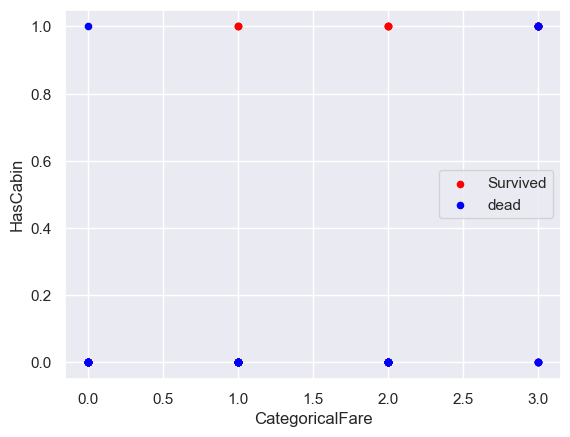

In [38]:
ax1=df[df['Survived']==1][0:50].plot(kind='scatter',x='CategoricalFare',y='HasCabin',color='red' ,label='Survived');
df[df['Survived']==0][0:50].plot(kind='scatter',x='CategoricalFare',y='HasCabin',color='blue' ,label='dead',ax=ax1);
plt.show()

In [39]:
df.columns

Index(['Title', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked',
       'HasCabin', 'IsAlone', 'CategoricalFare', 'Survived'],
      dtype='object')

In [ ]:
g=sns.pairplot(df,hue='Survived',markers='+')
plt.show()

In [ ]:
import plotly.express as px

# Your DataFrame (assuming 'df' is already defined)
# ...

# Create the 3D scatter plot with a custom color scale
fig = px.scatter_3d(df, x='Sex', y='CategoricalFare', z='IsAlone', color='Survived',
                    color_continuous_scale=px.colors.sequential.Rainbow)   # Choose any other valid color scale

fig.update_traces(marker=dict(size=2))
fig.show()


## Train your model (Classification)

In [ ]:
# Spliting target variable and independent variables
X = df.iloc[:,:-1]
Y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## LogisticRegression

In [ ]:
logic_r= LogisticRegression()
logic_r.fit(X_train,Y_train)

In [ ]:
Y_pred_lr=logic_r.predict(X_test)
Y_pred_lr

In [ ]:
# Assuming `Y_test_pred` is your NumPy array with predicted labels
unique, counts = np.unique(Y_pred_lr, return_counts=True)

# Display the counts for each unique number
for number, count in zip(unique, counts):
    print(f"Number {number}: {count} times")


In [ ]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(Y_test, Y_pred_lr)))

In [ ]:
import requests
from PIL import Image
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt

# Send an HTTP GET request
url = 'https://i.sstatic.net/NzSnD.jpg'
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the image and convert to a NumPy array
    image = Image.open(BytesIO(response.content))
    image_array = np.array(image)
    
    # Display the image
    plt.imshow(image_array)
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print(f"Error: {response.status_code}")


<img src="https://blog.cambridgecoaching.com/hubfs/One.png" width=60% />

In [ ]:
labels = ['Survived', 'Dead']

cm = confusion_matrix(Y_test, Y_pred_lr)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
#plt.savefig("Confusion_Matrix.png")

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Survived', 'Dead']); ax.yaxis.set_ticklabels(['Survived', 'Dead']);

In [ ]:
target_names = ['Dead', 'Survived']
print(classification_report(Y_test, Y_pred_lr, target_names=target_names))

### KNN Regressor

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
k=3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, Y_train)

In [ ]:
Y_pred_knn=neigh.predict(X_test)

In [ ]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != Y_test))
plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [ ]:
print(f'accuracy of Y_test , predict :{accuracy_score(Y_test, Y_pred_knn)}')
print(f'accuracy of y_train , predict :{accuracy_score(Y_train, neigh.predict(X_train))}')
print(f'classification_report of Y_test , predict :{classification_report(Y_test, Y_pred_knn)}')
print(f'confusion_matrix of Y_test , predict :{confusion_matrix(Y_test, Y_pred_knn)}')

In [ ]:
labels = ['Survived', 'Dead']

cm = confusion_matrix(Y_test, Y_pred_knn)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
#plt.savefig("Confusion_Matrix.png")

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT=DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier_DT.fit(X_train, Y_train)

In [ ]:
# Define the parameter grid correctly
parameters_tree = {
    'criterion': ['gini', 'entropy'],  # choose between Gini impurity and entropy
    'max_depth': [None, 5, 10, 15],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],  # minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # maximum features to consider at each split
}

In [ ]:
grid_search_tree=GridSearchCV(estimator=classifier_DT,
                        param_grid=parameters_tree,
                        scoring='accuracy',
                        cv=10,
                        n_jobs = -1)

In [ ]:
grid_search_tree.fit(X_train,Y_train)

In [ ]:
best_accuracy = grid_search_tree.best_score_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))

In [ ]:
best_parameters = grid_search_tree.best_params_
print("Best Parameters:", best_parameters)

In [ ]:
Y_pred_DT = classifier_DT.predict(X_test)

In [ ]:
df.columns

In [ ]:
feature_names = ['Title', 'Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked',
       'HasCabin', 'IsAlone', 'CategoricalFare']
dot_data = export_graphviz(classifier_DT, out_file=None,
                           feature_names=feature_names,
                           class_names=["servived_tree", "dead"],
                           filled=True)

graph = graphviz.Source(dot_data, format="png")
graph.render("servived_tree")  # Save the tree to a file
graph.view("servived_tree")

In [ ]:
from IPython.display import Image
# Create DOT data
dot_data = StringIO()
export_graphviz(classifier_DT, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=[f'feature_{i}' for i in range(X_train.shape[1])])

# Create the graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Display the decision tree
image = Image(graph.create_png())
display(image)

In [ ]:
accuracies_tree=cross_val_score(estimator=classifier_DT,X=X_train,y=Y_train,cv=10)

In [ ]:
print(f"Accuracy: {accuracies_tree.mean()*100}")
print(f"Standard Deviation: {accuracies_tree.std()*100}")

In [ ]:
print(f'accuracy of Y_test , predict :{accuracy_score(Y_test, Y_pred_DT)}')
print(f'accuracy of y_train , predict :{accuracy_score(Y_train, neigh.predict(X_train))}')
print(f'classification_report of Y_test , predict :{classification_report(Y_test, Y_pred_DT)}')
print(f'confusion_matrix of Y_test , predict :{confusion_matrix(Y_test, Y_pred_DT)}')

In [ ]:
labels = ['Survived', 'Dead']

cm = confusion_matrix(Y_test, Y_pred_DT)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
#plt.savefig("Confusion_Matrix.png")

## random forest

In [ ]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))

In [ ]:
# Define the parameter grid correctly
parameters_rf = {
    'criterion': ['gini', 'entropy'],  # choose between Gini impurity and entropy
    'max_depth': [None, 5, 10, 15],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],  # minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # maximum features to consider at each split
}


In [ ]:
# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc,
                              param_grid=parameters_rf,
                              scoring='f1',  # use 'f1' for the F1 score
                              cv=10,
                              n_jobs=-1)


In [ ]:
grid_search_rf.fit(X_train,Y_train)

In [ ]:
# Get the best parameters
best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation F1-Score: ", best_score)

In [ ]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))

## svm

In [ ]:
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

In [ ]:
y_pred_svc = svclassifier.predict(X_test)

In [ ]:
accuracies_svc=cross_val_score(estimator=svclassifier,X=X_train,y=Y_train,cv=10)

In [ ]:
print(f"Accuracy: {accuracies_svc.mean()*100}")
print(f"Standard Deviation: {accuracies_svc.std()*100}")

In [ ]:
# Define the parameter grid correctly for SVC
parameters_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [3, 4, 5]  # Degree of the polynomial kernel function (only relevant for 'poly')
}


In [ ]:
# Perform GridSearchCV
grid_search_svc = GridSearchCV(estimator=svclassifier,
                               param_grid=parameters_svc,
                               scoring='accuracy',  # or 'f1' if you prefer
                               cv=10,
                               n_jobs=-1)

In [ ]:
grid_search_svc.fit(X_train,Y_train)

In [ ]:
# Get the best parameters
best_params = grid_search_svc.best_params_
best_score = grid_search_svc.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation F1-Score: ", best_score)

In [ ]:
print(f'accuracy of Y_test , predict :{accuracy_score(Y_test, y_pred_svc)}')
print(f'accuracy of y_train , predict :{accuracy_score(Y_train, neigh.predict(X_train))}')
print(f'classification_report of Y_test , predict :{classification_report(Y_test, y_pred_svc)}')
print(f'confusion_matrix of Y_test , predict :{confusion_matrix(Y_test, y_pred_svc)}')

## XGBoost

In [ ]:
Xgb_df=xgb.XGBRFRegressor( n_estimators=1000,
                            learning_rate=1,
                            subsample=1,
                            colsample_bytree=1, 
                            max_depth=8,
                            gamma=1  
                           )
Xgb_df.fit(X_train,Y_train)

In [ ]:
Y_pred_xgb = Xgb_df.predict(X_test)

In [ ]:
# Define the parameter grid for XGBRFRegressor
parameters_xgb = {
    'n_estimators': [100, 500, 1000],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.3, 0.5],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1],  # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1],  # Subsample ratio of columns when constructing each tree
    'max_depth': [3, 5, 7, 9],  # Maximum depth of a tree
    'gamma': [0, 0.1, 0.3, 0.5]  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

In [ ]:
# Perform GridSearchCV
grid_search_xgb = GridSearchCV(estimator=Xgb_df,
                               param_grid=parameters_xgb,
                               scoring='r2',  # Adjust according to your evaluation metric
                               cv=10,
                               n_jobs=-1)


In [ ]:
# Fit the model with the grid search
grid_search_xgb.fit(X_train, Y_train)

In [ ]:

# Get the best parameters
best_params = grid_search_xgb.best_params_
best_score = grid_search_xgb.best_score_


print("Best Parameters: ", best_params)
print("Best Cross-Validation Score: ", best_score)

In [ ]:
sorce_xgb=cross_val_score(Xgb_df,X_train,Y_train,cv=10)
print(f"accurecy: {sorce_xgb.mean()}")
print(f"Standard Deviation: {sorce_xgb.std()*100}")

In [ ]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_xgb))
print("RMSE: %f" % (rmse))

In [ ]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(Y_test, Y_pred_xgb))
print("R_Squared Score : %f" % (r2))

In [ ]:
plt.figure(figsize=(40, 5), dpi=80)
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, label="test")
plt.plot(x_ax, Y_pred_xgb, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

## Test Result

In [ ]:
df_test=pd.read_csv('C:/Users/pc/Downloads/Video/project/Mini Project 3 - Classification(Titanic)/test.csv')
df_test

In [ ]:
df_test.info()

In [ ]:
df_test.describe()

In [ ]:
df_test = df_test.reindex(columns=['PassengerId','Name','Sex','Age','Pclass','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

In [ ]:
df_test

In [ ]:
def create_feat_has_cabin(df_test, colname):
    # if NA => 0 else 1
    def _is_nan(x):
        if isinstance(x, type(np.nan)):
            return 0
        return 1
        
    return df_test[colname].apply(_is_nan)
    
df_test['HasCabin'] = create_feat_has_cabin(df_test, 'Cabin')

In [ ]:
def fill_na_embarked(df_test, colname):
    
    return df_test[colname].fillna('S')
    
df_test['Embarked'] = fill_na_embarked(df_test, 'Embarked')

In [ ]:
def create_feat_familly_size(df):
    return df['SibSp'] + df_test['Parch'] + 1
    
df_test['FamilySize'] = create_feat_familly_size(df_test)

In [ ]:
def create_feat_isalone(df, colname):
    def _is_alone(x):
        if x==1:
            return 1
        return 0
    
    return df_test[colname].apply(_is_alone)
    
df_test['IsAlone'] = create_feat_isalone(df_test, 'FamilySize')

In [ ]:
df_test.Embarked.fillna(df_test.Embarked.mode()[0], inplace = True)
df_test['Age'].fillna(df['Age'].median(), inplace=True)
df_test.fillna(df_test.mean(),inplace=True)

In [ ]:
df_test['Sex'] = df_test['Sex'].astype('category').cat.codes.astype(float)
df_test['Embarked'].replace(to_replace=['S', 'C', 'Q'], value=[1, 2, 3], inplace=True)

In [ ]:
def create_feat_categoricalFare(df_test, colname):
    return pd.qcut(df_test[colname], 4, labels = [0, 1, 2, 3]).astype(int)
df_test['CategoricalFare'] = create_feat_categoricalFare(df_test, 'Fare')

In [ ]:
def create_feat_title(df_test, colname):
    def find_title(z):
        title_search = re.search(' ([A-Za-z]+)\.', z)
        if title_search:
            title = title_search.group(1)
            if title in ['Mlle', 'Ms']:
                return 'Miss'
            elif title in ['Mme', 'Mrs']:
                return 'Mrs'
            elif title=='Mr':
                return 'Mr'           
            else:
                return 'Rare'
        return ""
    
    return_title= df_test[colname].apply(find_title)
    dict_title = {'Miss': 1, 'Mrs':2, 'Mr':3, 'Rare':4}
    return return_title.replace(dict_title)
df_test['Title'] = create_feat_title(df_test, 'Name')

In [ ]:
df_test.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df_test = df_test.reindex(columns=['Title','Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'Embarked',
        'HasCabin', 'IsAlone', 'CategoricalFare'])

In [ ]:
df_test = df_test.astype(float)

In [ ]:
df_test

In [ ]:
X_df_test=df_test.iloc[:,:].values

In [ ]:
Y_pred_knn_final_test=neigh.predict(X_df_test)

### as you see best knn has best accrecy so i use it 